In [1]:
import pandas as pd


In [7]:
df=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\EEGProject\\data\\emotions.csv')

In [10]:
print(df.head())
print(df.columns.tolist())

   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [20]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [12]:
df=df.dropna()

In [14]:
x=df.drop(columns=['label'])
y=df['label']

In [17]:
# Encode the label column (e.g., positive/neutral/negative → 0/1/2)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [18]:
selector=SelectKBest(score_func=mutual_info_classif,k=63)
x_selected=selector.fit_transform(x,y_encoded)

In [19]:
selected_indices = selector.get_support(indices=True)
selected_features = x.columns[selected_indices].tolist()

print("Top 63 features based on Information Gain:")
for f in selected_features:
    print(f)

Top 63 features based on Information Gain:
# mean_0_a
mean_2_a
mean_3_a
mean_d_2_a2
mean_d_7_a
mean_d_12_a
mean_d_17_a
mean_d_18_a
stddev_0_a
moments_7_a
min_2_a
min_q_2_a
min_q_7_a
min_q_12_a
min_q_17_a
covmat_0_a
covmat_1_a
covmat_4_a
covmat_8_a
covmat_9_a
covmat_12_a
covmat_13_a
covmat_15_a
covmat_20_a
covmat_37_a
covmat_48_a
covmat_69_a
covmat_96_a
covmat_97_a
covmat_104_a
covmat_108_a
covmat_113_a
mean_0_b
mean_2_b
mean_3_b
mean_d_2_b2
mean_d_7_b
mean_d_12_b
mean_d_17_b
stddev_0_b
moments_7_b
min_2_b
min_q_2_b
min_q_7_b
min_q_12_b
min_q_17_b
covmat_0_b
covmat_1_b
covmat_4_b
covmat_8_b
covmat_9_b
covmat_12_b
covmat_13_b
covmat_15_b
covmat_20_b
covmat_37_b
covmat_48_b
covmat_69_b
covmat_96_b
covmat_97_b
covmat_104_b
covmat_108_b
covmat_113_b


In [22]:
# Standardizing the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_selected)

In [23]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [25]:
# Create a DataFrame for plotting
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
df_pca['label'] = y  # Original emotion labels (non-encoded)


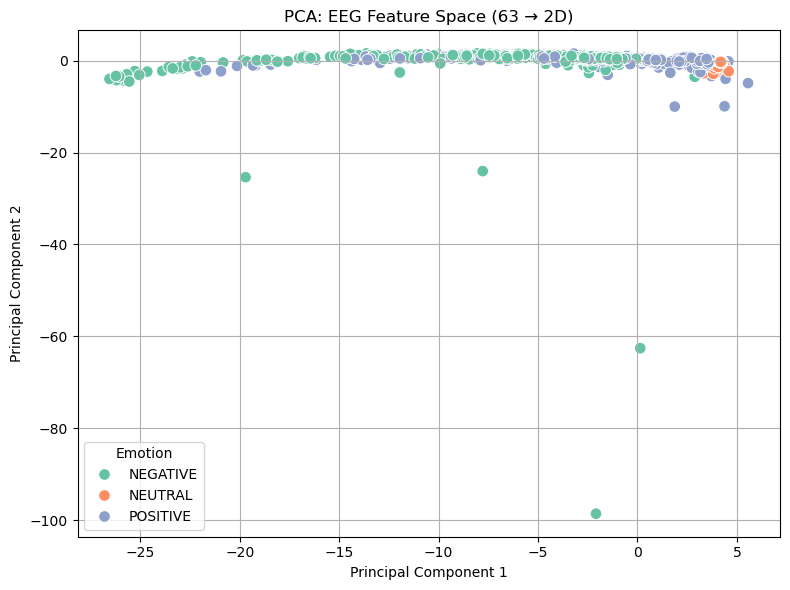

In [26]:
# Plotting PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', palette='Set2', s=70)
plt.title('PCA: EEG Feature Space (63 → 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Emotion')
plt.tight_layout()
plt.show()

In [27]:
print(pca.explained_variance_ratio_)

[0.56476471 0.12128469]


Accuracy: 0.9789227166276346

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       143
           1       1.00      0.99      1.00       148
           2       0.97      0.96      0.97       136

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



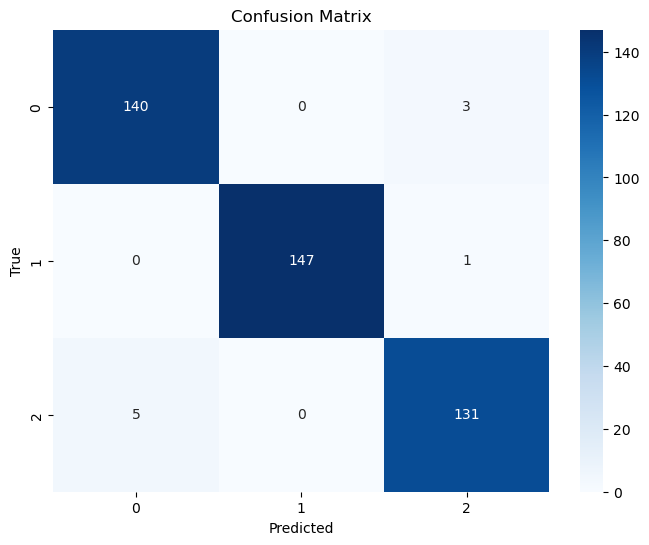

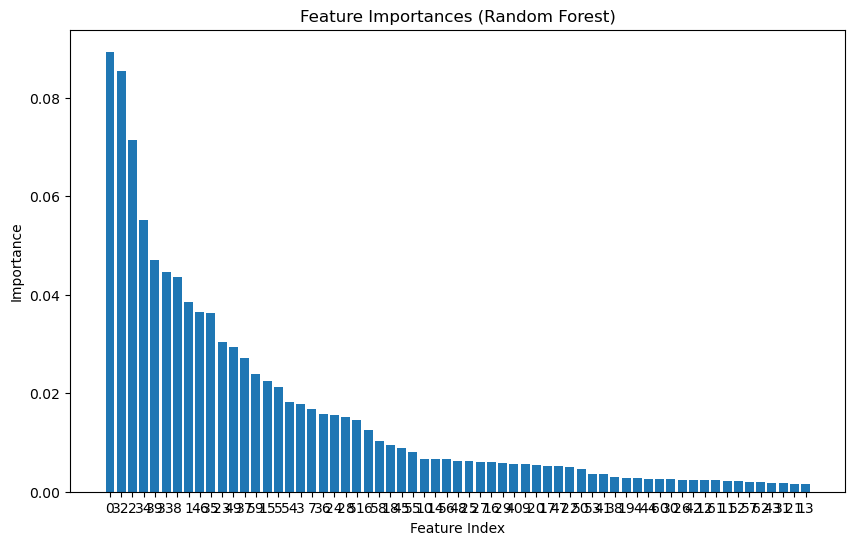

In [28]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Assuming you already have X_selected and y_encoded from your feature selection step
# If not, make sure X_selected = selector.fit_transform(X, y_encoded)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    x_selected, y_encoded, test_size=0.2, random_state=42
)

# 4. Train Random Forest Classifier
rf = RandomForestClassifier(
    n_estimators=100,  # number of trees
    random_state=42
)
rf.fit(X_train, y_train)

# 5. Predictions
y_pred = rf.predict(X_test)

# 6. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 7. Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 9. Feature Importance Plot
importances = rf.feature_importances_
indices = importances.argsort()[::-1]  # sort descending

plt.figure(figsize=(10,6))
plt.bar(range(x_selected.shape[1]), importances[indices], align='center')
plt.xticks(range(x_selected.shape[1]), indices)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.show()


Accuracy: 0.9718969555035128

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       143
           1       1.00      0.98      0.99       148
           2       0.96      0.95      0.96       136

    accuracy                           0.97       427
   macro avg       0.97      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427



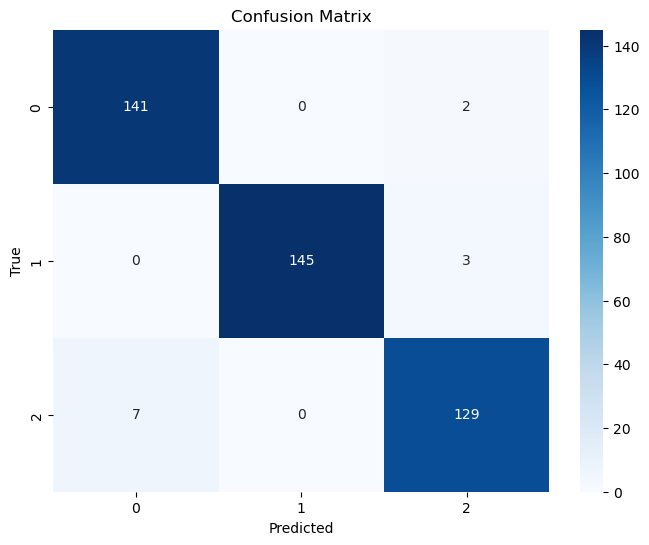

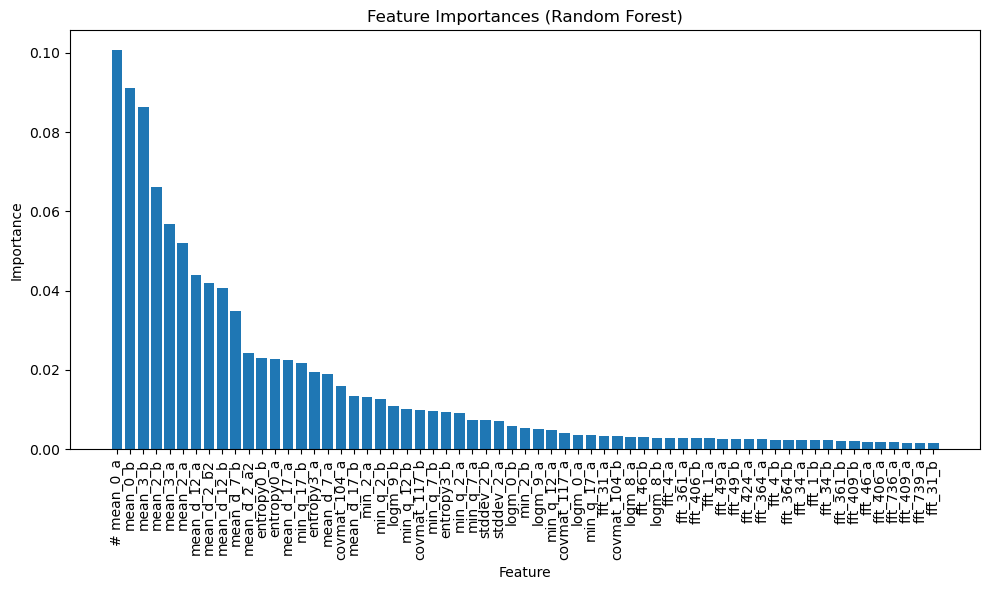

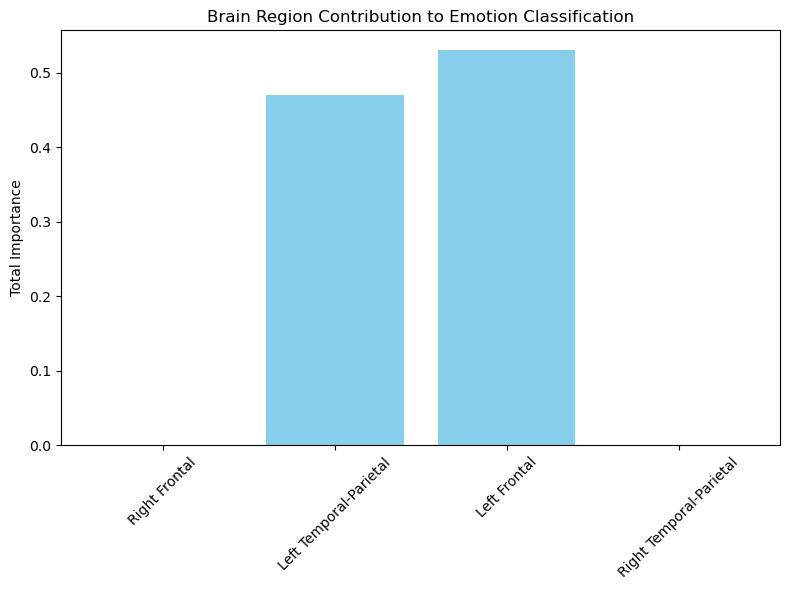

In [45]:
# 1. Keep original feature names before selection
feature_names = x.columns

# 2. Feature selection (example with SelectKBest)
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=63)
x_selected = selector.fit_transform(x, y_encoded)

# 3. Get names of selected features
selected_feature_names = feature_names[selector.get_support(indices=True)]

# 4. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_selected, y_encoded, test_size=0.2, random_state=42
)

# 5. Train Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. Predictions & Accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7. Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# 8. Feature Importances with Names
import numpy as np
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(selected_feature_names)), importances[indices], align='center')
plt.xticks(range(len(selected_feature_names)),
           selected_feature_names[indices],
           rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

# Map feature suffixes to electrode names
suffix_to_channel = {
    "_a": "TP9",
    "_a1": "TP9",
    "_a2": "TP9",
    "_b": "AF7",
    "_b1": "AF7",
    "_b2": "AF7",
    "_c": "AF8",
    "_c1": "AF8",
    "_c2": "AF8",
    "_d": "TP10",
    "_d1": "TP10",
    "_d2": "TP10"
}



# Brain region mapping
brain_region_map = {
    "TP9": "Left Temporal-Parietal",
    "AF7": "Left Frontal",
    "AF8": "Right Frontal",
    "TP10": "Right Temporal-Parietal"
}

# Aggregate feature importances by brain region
region_importance = {region: 0 for region in set(brain_region_map.values())}

for feat_name, importance in zip(selected_feature_names, rf.feature_importances_):
    matched = False
    for suffix, channel in suffix_to_channel.items():
        if feat_name.endswith(suffix):
            region = brain_region_map[channel]
            region_importance[region] += importance
            matched = True
            break
    if not matched:
        print(f"⚠ Feature '{feat_name}' did not match any channel suffix.")

# Plot
plt.figure(figsize=(8,6))
plt.bar(region_importance.keys(), region_importance.values(), color='skyblue')
plt.ylabel("Total Importance")
plt.title("Brain Region Contribution to Emotion Classification")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



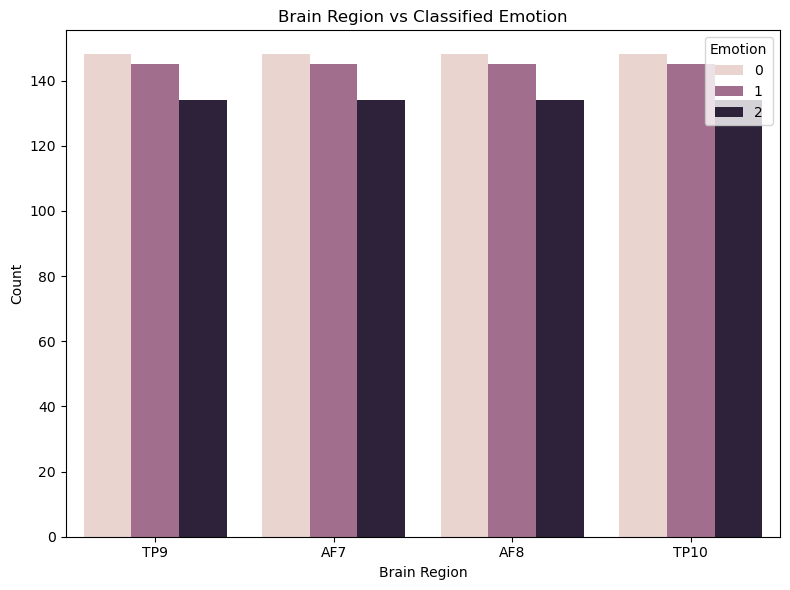

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping suffix to channel name
suffix_to_channel = {
    "_a": "TP9",
    "_b": "AF7",
    "_c": "AF8",
    "_d": "TP10"
}

# Map features to brain regions
feature_to_region = {}
for feat in feature_names:
    for suffix, region in suffix_to_channel.items():
        if suffix in feat:
            feature_to_region[feat] = region
            break

# Count the occurrences of each predicted emotion per brain region
region_emotion_counts = []

# Loop over predictions and assign brain regions (simplified assumption: each sample tied to one region)
for pred in y_pred:
    for region in suffix_to_channel.values():
        region_emotion_counts.append({"Brain Region": region, "Predicted Emotion": pred})

df_plot = pd.DataFrame(region_emotion_counts)

# Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df_plot, x="Brain Region", hue="Predicted Emotion")
plt.title("Brain Region vs Classified Emotion")
plt.ylabel("Count")
plt.xlabel("Brain Region")
plt.legend(title="Emotion")
plt.tight_layout()
plt.show()


In [49]:
pip install isort black nbformat jupyterlab_code_formatter


   ---------------------------------------- 5/5 [jupyterlab_code_formatter]

Note: you may need to restart the kernel to use updated packages.
